In [87]:
import pandas as pd
import numpy as np
import json
import re

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import glob

In [88]:
# Spiele in GER auslesen 
df = pd.read_csv('matches_ger_with_goals_count.csv', index_col=0)

In [89]:
# Funktionen zum Extrahieren der Tore definieren
def extract_goals_home(label):
    goals = label.split(', ')[1].split(' - ')[0]
    return int(goals)

def extract_goals_away(label):
    goals = label.split(', ')[1].split(' - ')[1]
    return int(goals)

def extract_home(label):
    team = label.split(', ')[0].split(' - ')[0]
    return team

def extract_away(label):
    team = label.split(', ')[0].split(' - ')[1]
    return team


# Die Funktionen auf den DataFrame anwenden, um die neuen Spalten zu erstellen
df['goals_home'] = df['label'].apply(extract_goals_home)
df['goals_away'] = df['label'].apply(extract_goals_away)
df['team_home'] = df['label'].apply(extract_home)
df['team_away'] = df['label'].apply(extract_away)
df

,wyId,label,numbGoals,goals_home,goals_away,team_home,team_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt
...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund


In [90]:
dft = pd.DataFrame()
with open('Wyscout_18_19/teams.json') as f:
        data = json.load(f)
    #dfs.append(data)
    #data = pd.read_json(file, lines=True) # read data frame from json file
data = pd.DataFrame(data)# append the data frame to the list
dft = pd.concat([dft, data], ignore_index=True)
dft

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


In [91]:
import codecs

# Funktion zur Ersetzung der Escape-Sequenzen definieren
def replace_escape_sequences(text):
    text = text.encode().decode('unicode-escape')
    #return text
    return codecs.escape_decode(text.encode('utf-8'))[0].decode('utf-8')

dft['name'] = dft['name'].apply(replace_escape_sequences)
dft['officialName'] = dft['officialName'].apply(replace_escape_sequences)
dft.to_csv('mod_teams.csv')

In [92]:
df = df.rename(columns={'wyId':'matchId'})

In [93]:
df.rename(columns={'wyId':'ID'})

# Die IDs der Heim- und Auswärtsteams aus dem ersten DataFrame abrufen
df = df.merge(dft, left_on='team_home', right_on='name', how='left')#, suffixes=('_away', '_home'))
df = df.rename(columns={'wyId': 'id_home'})
df = df.drop(columns=['name', 'city', 'officialName', 'area', 'type'])

df = df.merge(dft, left_on='team_away', right_on='name', how='left')#, suffixes=('_home', '_away'))
df = df.rename(columns={'wyId': 'id_away'})
df = df.drop(columns=['name', 'city', 'officialName', 'area', 'type'])
df


,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462
...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447


In [94]:
xG_df = pd.read_csv('xG_full.csv', index_col=0)

#xG_df.astype({'matchId':'int64', 'teamId':'int64'}).dtypes
xG_df[['matchId', 'teamId']] = xG_df[['matchId', 'teamId']].astype(int)
print(sum(xG_df['Goal']))
xG_df

5106


,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG
0,1,6,57,7.0,2500686,3799,605.975493,7.530106,0.792427,0.343090
1,1,4,43,7.0,2500686,3772,1568.104834,6.058259,0.898499,0.428836
2,0,16,21,29.0,2500686,3772,1800.852078,24.724937,0.193428,0.027492
3,0,27,51,1.0,2500686,3799,2009.537139,27.007823,0.269317,0.024338
4,0,28,59,9.0,2500686,3799,2072.957133,28.604589,0.249363,0.020760
...,...,...,...,...,...,...,...,...,...,...
2199,0,21,63,13.0,2500095,1625,1692.455205,22.636309,0.298827,0.082210
2200,0,21,39,11.0,2500096,10531,786.233932,22.183834,0.310702,0.085575
2201,0,23,37,13.0,2500096,10531,2587.108567,24.503112,0.279313,0.071490
2202,0,17,27,23.0,2500097,1624,2342.553411,22.638518,0.244344,0.078478


In [95]:
df

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462
...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447


In [96]:
for i, match in df.iterrows():
    match_xG = xG_df[xG_df['matchId']==match["matchId"]]
    match_xG_home = match_xG[match_xG['teamId'] == match["id_home"]]
    match_xG_away = match_xG[match_xG['teamId'] == match["id_away"]]

    
    df.at[i, "xG_home"] = sum(match_xG_home['xG'])
    df.at[i,"shots_home"] = len(match_xG_home['xG'])
    df.at[i, "xG_away"] = sum(match_xG_away['xG'])
    df.at[i, "shots_away"] = len(match_xG_away['xG'])

In [97]:
df.to_csv('matches_xG.csv')
df

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445,0.447719,9.0,0.905830,8.0
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481,0.909762,12.0,0.974326,12.0
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455,1.056498,13.0,0.557602,6.0
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447,0.425455,7.0,1.225814,13.0


## special match searcher

In [98]:
df[df['matchId']==2516739]

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away
305,2516739,"Bayern München - Bayer Leverkusen, 3 - 1",4,3,1,Bayern München,Bayer Leverkusen,2444,2446,2.232692,13.0,2.244308,20.0


In [99]:
bsp_df = xG_df[xG_df['matchId']==2516739]
bsp_df#[bsp_df['teamId']==2444]

,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG
13608,0,17,66,16.0,2516739,2444,247.703507,19.928874,0.313564,0.051505
13609,0,9,66,16.0,2516739,2446,668.234340,13.753545,0.358613,0.110848
13610,0,12,49,1.0,2516739,2446,672.925920,12.017591,0.590580,0.172880
13611,0,26,42,8.0,2516739,2444,949.131592,26.514901,0.269266,0.025423
13612,0,6,66,16.0,2516739,2446,1203.137020,12.006665,0.324033,0.132578
13613,0,9,73,23.0,2516739,2444,1375.956746,17.450000,0.222560,0.061541
13614,0,22,60,10.0,2516739,2446,1403.332397,22.940139,0.304257,0.037164
13615,0,7,37,13.0,2516739,2444,1594.240338,10.972807,0.446583,0.170243
13616,0,20,57,7.0,2516739,2446,2209.374008,20.511034,0.345055,0.050097
13617,0,22,63,13.0,2516739,2446,2469.785203,23.566979,0.288811,0.034307


In [100]:
bsp_df['Y'] = bsp_df['Y']*0.65
bsp_df["color"] = "green"
#bsp_df.loc[13608, "color"]
for i,j in bsp_df.iterrows():
    #print(i)
    #print(j)
    if j["teamId"] == 2444:
        bsp_df.loc[i,"color"] = "red"
    else: 
        bsp_df.loc[i,"color"] = "blue"
        
    
    
bsp_df

/var/folders/rb/910_c2gs4n50kzjbpsbr8mhc0000gn/T/ipykernel_79071/294002568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsp_df['Y'] = bsp_df['Y']*0.65
/var/folders/rb/910_c2gs4n50kzjbpsbr8mhc0000gn/T/ipykernel_79071/294002568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsp_df["color"] = "green"


,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG,color
13608,0,17,42.90,16.0,2516739,2444,247.703507,19.928874,0.313564,0.051505,red
13609,0,9,42.90,16.0,2516739,2446,668.234340,13.753545,0.358613,0.110848,blue
13610,0,12,31.85,1.0,2516739,2446,672.925920,12.017591,0.590580,0.172880,blue
13611,0,26,27.30,8.0,2516739,2444,949.131592,26.514901,0.269266,0.025423,red
13612,0,6,42.90,16.0,2516739,2446,1203.137020,12.006665,0.324033,0.132578,blue
13613,0,9,47.45,23.0,2516739,2444,1375.956746,17.450000,0.222560,0.061541,red
13614,0,22,39.00,10.0,2516739,2446,1403.332397,22.940139,0.304257,0.037164,blue
13615,0,7,24.05,13.0,2516739,2444,1594.240338,10.972807,0.446583,0.170243,red
13616,0,20,37.05,7.0,2516739,2446,2209.374008,20.511034,0.345055,0.050097,blue
13617,0,22,40.95,13.0,2516739,2446,2469.785203,23.566979,0.288811,0.034307,blue


In [101]:
sum(bsp_df[bsp_df["teamId"]==2446]["xG"])

2.2443076509157884

In [102]:
Tore_bsp = bsp_df[bsp_df["Goal"]==1]
bsp_df = bsp_df[bsp_df["Goal"]==0]
bsp_df

,Goal,X,Y,C,matchId,teamId,eventSec,Distance,Angle,xG,color
13608,0,17,42.90,16.0,2516739,2444,247.703507,19.928874,0.313564,0.051505,red
13609,0,9,42.90,16.0,2516739,2446,668.234340,13.753545,0.358613,0.110848,blue
13610,0,12,31.85,1.0,2516739,2446,672.925920,12.017591,0.590580,0.172880,blue
13611,0,26,27.30,8.0,2516739,2444,949.131592,26.514901,0.269266,0.025423,red
13612,0,6,42.90,16.0,2516739,2446,1203.137020,12.006665,0.324033,0.132578,blue
13613,0,9,47.45,23.0,2516739,2444,1375.956746,17.450000,0.222560,0.061541,red
13614,0,22,39.00,10.0,2516739,2446,1403.332397,22.940139,0.304257,0.037164,blue
13615,0,7,24.05,13.0,2516739,2444,1594.240338,10.972807,0.446583,0.170243,red
13616,0,20,37.05,7.0,2516739,2446,2209.374008,20.511034,0.345055,0.050097,blue
13617,0,22,40.95,13.0,2516739,2446,2469.785203,23.566979,0.288811,0.034307,blue


Text(0.5, 1.0, 'FC Bayern München - Bayer 04 Leverkusen 3:1')

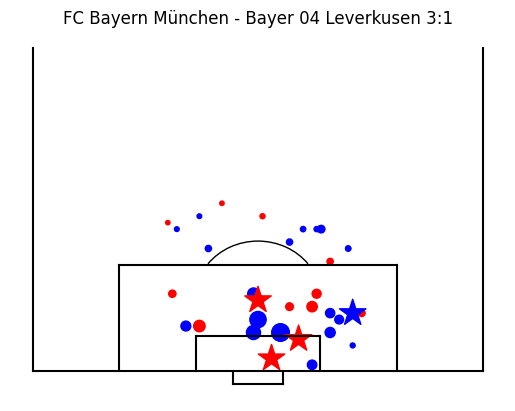

In [103]:
from matplotlib.patches import Arc, Circle

plt = bsp_df.plot.scatter(x='Y', y='X',s=400*bsp_df['xG'],color=bsp_df["color"])
linecolor='black'
#Pitch Outline & Centre Line
plt.plot([0,65],[0,0], color=linecolor)
plt.plot([65,65],[50,0], color=linecolor)
plt.plot([0,0],[50,0], color=linecolor)

#Left Penalty Area
plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
plt.plot([52.5,52.5],[16.5,0],color=linecolor)
plt.plot([12.5,12.5],[0,16.5],color=linecolor)

#Left 6-yard Box
plt.plot([41.5,41.5],[5.5,0],color=linecolor)
plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
plt.plot([23.5,23.5],[0,5.5],color=linecolor)

#Goal
plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)

#Prepare Circles
leftPenSpot = Circle((65/2,11),0.8,color=linecolor)

#Draw Circles
plt.add_patch(leftPenSpot)

#Prepare Arcs
leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)

#Draw Arcs
plt.add_patch(leftArc)

#Tidy Axes
plt.axis('off')

plt.scatter(x=Tore_bsp["Y"], y=Tore_bsp["X"], color=Tore_bsp["color"], marker="*", s=400)
plt.set_title('FC Bayern München - Bayer 04 Leverkusen 3:1')

## einfache Kalkulationen zur Evaluierung des xG Modells 

In [104]:
anz_xG = sum(df["xG_away"]) + sum(df["xG_home"])
anz_tore = sum(df["numbGoals"])
print(anz_xG)
print(anz_tore)

831.869961434131
855


In [105]:
df['goalDiffxG'] = df['xG_home'] - df['xG_away']

dom_stark_xG = df[abs(df['goalDiffxG'])>=1.5]
print(dom_stark_xG.shape)
dom_schwach_xG = df[(abs(df['goalDiffxG'])>=0.5) & (abs(df['goalDiffxG'])<1.5)]
print(dom_schwach_xG.shape)
dom_no_xG = df[abs(df['goalDiffxG'])<0.5]
print(dom_no_xG.shape)

(61, 14)
(143, 14)
(102, 14)


In [106]:
df['goalDiff'] = df['goals_home'] - df['goals_away']

dom_stark = df[abs(df['goalDiff'])>=2]
print(dom_stark.shape)
dom_schwach = df[(abs(df['goalDiff'])>=1) & (abs(df['goalDiff'])<2)]
print(dom_schwach.shape)
dom_no = df[abs(df['goalDiff'])<1]
print(dom_no.shape)

(118, 15)
(105, 15)
(83, 15)


In [107]:
print(sum(xG_df['Goal']))
print(sum(xG_df['xG']))

5106
5129.080000000527


## Varianz Schätzung Bundesliga Test - ignorieren 


In [108]:
df['xGSum'] = df['xG_away'] + df['xG_home']
mean_xG = anz_xG/306
df["VarDiff"] = (df['xGSum']-mean_xG)**2
(1/306)*sum(df['VarDiff'])

0.7836570978928765

In [109]:
df['VarDiff']

0      0.002765
1      0.090309
2      0.017294
3      1.513841
4      1.978771
         ...   
301    1.863169
302    0.696293
303    1.219765
304    1.139044
305    3.092217
Name: VarDiff, Length: 306, dtype: float64

In [110]:
df

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,goalDiffxG,goalDiff,xGSum,VarDiff
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.149071,-3,2.665944,0.002765
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.523922,2,2.418015,0.090309
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.073518,-4,2.587024,0.017294
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,1.126793,2,1.488147,1.513841
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.528978,1,1.311841,1.978771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445,0.447719,9.0,0.905830,8.0,-0.458111,2,1.353550,1.863169
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481,0.909762,12.0,0.974326,12.0,-0.064563,1,1.884088,0.696293
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455,1.056498,13.0,0.557602,6.0,0.498896,-1,1.614100,1.219765
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447,0.425455,7.0,1.225814,13.0,-0.800359,-3,1.651269,1.139044


In [111]:
print("Anzahl Heimsiege : {}".format(len(df[df['goalDiff']>0])))
print("Prozent Heimsiege : {}%".format(len(df[df['goalDiff']>0])/306*100))

print("Anzahl Auswärtssiege : {}".format(len(df[df['goalDiff']<0])))
print("Prozent Auswärtssiege : {}%".format(len(df[df['goalDiff']<0])/306*100))

print("Anzahl Unentschieden : {}".format(len(df[df['goalDiff']==0])))
print("Prozent Unentschieden : {}%".format(len(df[df['goalDiff']==0])/306*100))


Anzahl Heimsiege : 139
Prozent Heimsiege : 45.42483660130719%
Anzahl Auswärtssiege : 84
Prozent Auswärtssiege : 27.450980392156865%
Anzahl Unentschieden : 83
Prozent Unentschieden : 27.124183006535947%


## Ordinale Response erzeugen 


In [112]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,goalDiffxG,goalDiff,xGSum,VarDiff
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.149071,-3,2.665944,0.002765
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.523922,2,2.418015,0.090309
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.073518,-4,2.587024,0.017294
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,1.126793,2,1.488147,1.513841
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.528978,1,1.311841,1.978771


In [113]:
for i, row in df.iterrows():
    if row['goalDiff'] <= -2:
        df.at[i,"ordresp"] = 5
    elif row['goalDiff'] <0:
        df.at[i, 'ordresp'] = 4
    elif row['goalDiff'] ==0:
        df.at[i, 'ordresp'] = 3
    elif row['goalDiff'] <2:
        df.at[i, 'ordresp'] = 2
    elif row['goalDiff'] >=2:
        df.at[i, 'ordresp'] = 1
        

In [114]:
df.head()

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,goalDiffxG,goalDiff,xGSum,VarDiff,ordresp
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.149071,-3,2.665944,0.002765,5.0
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.523922,2,2.418015,0.090309,1.0
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.073518,-4,2.587024,0.017294,5.0
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,1.126793,2,1.488147,1.513841,1.0
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.528978,1,1.311841,1.978771,2.0


array([[<Axes: title={'center': 'ordresp'}>]], dtype=object)

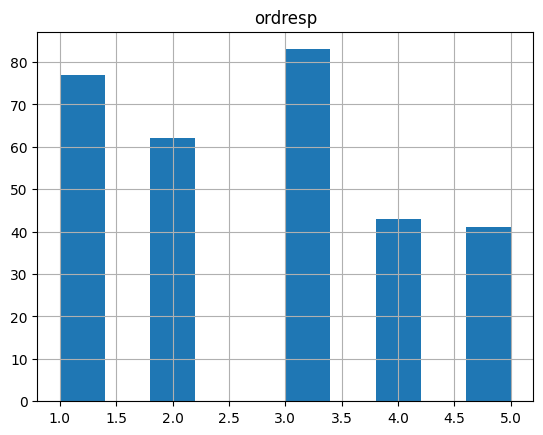

In [115]:
df_scores = df[['team_home', 'team_away', 'ordresp']]
df_scores.hist()

In [116]:
for i, row in df.iterrows():
    if row['goalDiffxG'] <= -2:
        df.at[i,"ordrespxG"] = 5
    elif row['goalDiffxG'] <0:
        df.at[i, 'ordrespxG'] = 4
    elif row['goalDiffxG'] ==0:
        df.at[i, 'ordrespxG'] = 3
    elif row['goalDiffxG'] <2:
        df.at[i, 'ordrespxG'] = 2
    elif row['goalDiffxG'] >=2:
        df.at[i, 'ordrespxG'] = 1
        
df

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,goalDiffxG,goalDiff,xGSum,VarDiff,ordresp,ordrespxG
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.149071,-3,2.665944,0.002765,5.0,2.0
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.523922,2,2.418015,0.090309,1.0,2.0
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.073518,-4,2.587024,0.017294,5.0,2.0
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,1.126793,2,1.488147,1.513841,1.0,2.0
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.528978,1,1.311841,1.978771,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445,0.447719,9.0,0.905830,8.0,-0.458111,2,1.353550,1.863169,1.0,4.0
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481,0.909762,12.0,0.974326,12.0,-0.064563,1,1.884088,0.696293,2.0,4.0
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455,1.056498,13.0,0.557602,6.0,0.498896,-1,1.614100,1.219765,4.0,2.0
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447,0.425455,7.0,1.225814,13.0,-0.800359,-3,1.651269,1.139044,5.0,4.0


array([[<Axes: title={'center': 'ordrespxG'}>]], dtype=object)

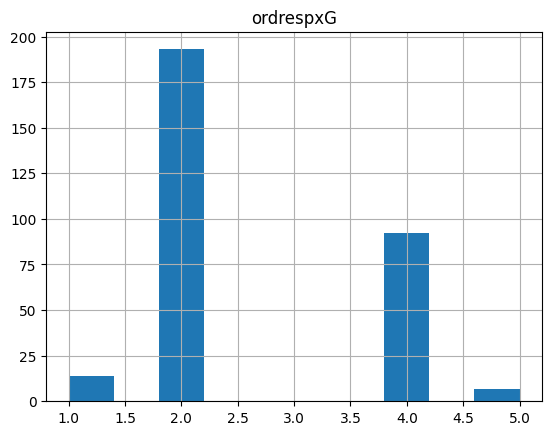

In [117]:
df_scores_xG = df[['team_home', 'team_away', 'ordrespxG']]
df_scores_xG.hist()

In [118]:
for i, row in df.iterrows():
    if row['goalDiffxG'] <= -1.5:
        df.at[i,"ordroundxG"] = 5
    elif row['goalDiffxG'] <=-0.5:
        df.at[i, 'ordroundxG'] = 4
    elif row['goalDiffxG'] <0.5:
        df.at[i, 'ordroundxG'] = 3
    elif row['goalDiffxG'] <1.5:
        df.at[i, 'ordroundxG'] = 2
    elif row['goalDiffxG'] >=1.5:
        df.at[i, 'ordroundxG'] = 1
        
df

,matchId,label,numbGoals,goals_home,goals_away,team_home,team_away,id_home,id_away,xG_home,shots_home,xG_away,shots_away,goalDiffxG,goalDiff,xGSum,VarDiff,ordresp,ordrespxG,ordroundxG
0,2517036,"Bayern München - Stuttgart, 1 - 4",5,1,4,Bayern München,Stuttgart,2444,2445,1.407508,15.0,1.258437,7.0,0.149071,-3,2.665944,0.002765,5.0,2.0,3.0
1,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",4,3,1,Hoffenheim,Borussia Dortmund,2482,2447,1.470969,11.0,0.947046,10.0,0.523922,2,2.418015,0.090309,1.0,2.0,2.0
2,2517038,"Hertha BSC - RB Leipzig, 2 - 6",8,2,6,Hertha BSC,RB Leipzig,2457,2975,1.330271,8.0,1.256753,17.0,0.073518,-4,2.587024,0.017294,5.0,2.0,3.0
3,2517039,"Freiburg - Augsburg, 2 - 0",2,2,0,Freiburg,Augsburg,2453,2481,1.307470,11.0,0.180677,4.0,1.126793,2,1.488147,1.513841,1.0,2.0,2.0
4,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",1,1,0,Schalke 04,Eintracht Frankfurt,2449,2462,0.920409,11.0,0.391432,5.0,0.528978,1,1.311841,1.978771,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2516741,"Hertha BSC - Stuttgart, 2 - 0",2,2,0,Hertha BSC,Stuttgart,2457,2445,0.447719,9.0,0.905830,8.0,-0.458111,2,1.353550,1.863169,1.0,4.0,3.0
302,2516745,"Hamburger SV - Augsburg, 1 - 0",1,1,0,Hamburger SV,Augsburg,2450,2481,0.909762,12.0,0.974326,12.0,-0.064563,1,1.884088,0.696293,2.0,4.0,3.0
303,2516746,"Mainz 05 - Hannover 96, 0 - 1",1,0,1,Mainz 05,Hannover 96,2460,2455,1.056498,13.0,0.557602,6.0,0.498896,-1,1.614100,1.219765,4.0,2.0,3.0
304,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3",3,0,3,Wolfsburg,Borussia Dortmund,2451,2447,0.425455,7.0,1.225814,13.0,-0.800359,-3,1.651269,1.139044,5.0,4.0,4.0


In [119]:
df_ordroundxG=df[['team_home', 'team_away','xG_home','xG_away']]
df_ordroundxG.head()

,team_home,team_away,xG_home,xG_away
0,Bayern München,Stuttgart,1.407508,1.258437
1,Hoffenheim,Borussia Dortmund,1.470969,0.947046
2,Hertha BSC,RB Leipzig,1.330271,1.256753
3,Freiburg,Augsburg,1.307470,0.180677
4,Schalke 04,Eintracht Frankfurt,0.920409,0.391432


array([[<Axes: title={'center': 'ordroundxG'}>]], dtype=object)

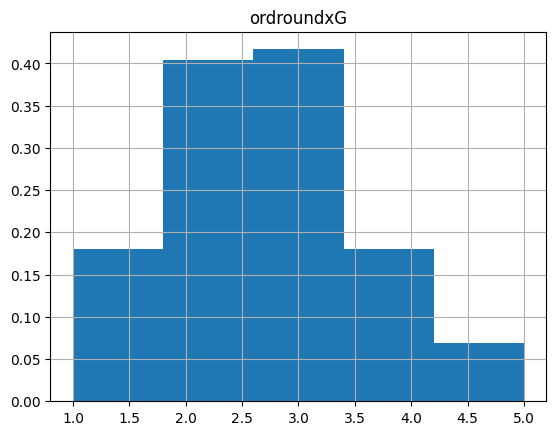

In [120]:
df_scores_xG_2 = df[['team_home', 'team_away', 'ordroundxG']]
df_scores_xG_2.hist(bins=5, density=True)

In [121]:
df_scores

,team_home,team_away,ordresp
0,Bayern München,Stuttgart,5.0
1,Hoffenheim,Borussia Dortmund,1.0
2,Hertha BSC,RB Leipzig,5.0
3,Freiburg,Augsburg,1.0
4,Schalke 04,Eintracht Frankfurt,2.0
...,...,...,...
301,Hertha BSC,Stuttgart,1.0
302,Hamburger SV,Augsburg,2.0
303,Mainz 05,Hannover 96,4.0
304,Wolfsburg,Borussia Dortmund,5.0


## Tabelle nach ordroundxG

In [122]:
df_scores_xG_2.head()

,team_home,team_away,ordroundxG
0,Bayern München,Stuttgart,3.0
1,Hoffenheim,Borussia Dortmund,2.0
2,Hertha BSC,RB Leipzig,3.0
3,Freiburg,Augsburg,2.0
4,Schalke 04,Eintracht Frankfurt,2.0


In [123]:
df_teams = pd.DataFrame(df_scores_xG_2["team_home"].drop_duplicates())
df_teams["Punkte"]=0
df_teams

,team_home,Punkte
0,Bayern München,0
1,Hoffenheim,0
2,Hertha BSC,0
3,Freiburg,0
4,Schalke 04,0
5,Bayer Leverkusen,0
6,Hamburger SV,0
7,Mainz 05,0
8,Wolfsburg,0
9,Borussia Dortmund,0


In [124]:
for i,j in df_scores_xG_2.iterrows():
    if j["ordroundxG"] >3:
        df_teams.loc[df_teams[df_teams["team_home"]==j["team_away"]].index[0],"Punkte"] +=3
    elif j["ordroundxG"] ==3:
        df_teams.loc[df_teams[df_teams["team_home"]==j["team_away"]].index[0],"Punkte"] +=1
        df_teams.loc[df_teams[df_teams["team_home"]==j["team_home"]].index[0],"Punkte"] +=1
    else:
        df_teams.loc[df_teams[df_teams["team_home"]==j["team_home"]].index[0],"Punkte"] +=3
    

In [125]:
df_teams["Tore"]=0
df_teams["Gegentore"]=0
df_teams

,team_home,Punkte,Tore,Gegentore
0,Bayern München,78,0,0
1,Hoffenheim,49,0,0
2,Hertha BSC,42,0,0
3,Freiburg,36,0,0
4,Schalke 04,48,0,0
5,Bayer Leverkusen,62,0,0
6,Hamburger SV,37,0,0
7,Mainz 05,36,0,0
8,Wolfsburg,32,0,0
9,Borussia Dortmund,65,0,0


In [126]:
df_ordroundxG.head()

,team_home,team_away,xG_home,xG_away
0,Bayern München,Stuttgart,1.407508,1.258437
1,Hoffenheim,Borussia Dortmund,1.470969,0.947046
2,Hertha BSC,RB Leipzig,1.330271,1.256753
3,Freiburg,Augsburg,1.307470,0.180677
4,Schalke 04,Eintracht Frankfurt,0.920409,0.391432


In [127]:
for i,j in df_ordroundxG.iterrows():
    df_teams.loc[df_teams[df_teams["team_home"]==j["team_away"]].index[0],"Tore"] += j["xG_away"]
    df_teams.loc[df_teams[df_teams["team_home"]==j["team_home"]].index[0],"Gegentore"] += j["xG_away"]
    df_teams.loc[df_teams[df_teams["team_home"]==j["team_home"]].index[0],"Tore"] += j["xG_home"]
    df_teams.loc[df_teams[df_teams["team_home"]==j["team_away"]].index[0],"Gegentore"] += j["xG_home"]

In [128]:
df_teams["Tordifferenz"] = df_teams["Tore"]-df_teams["Gegentore"]
df_teams = df_teams.sort_values(by=["Punkte","Tordifferenz"], ascending = False)
df_teams = df_teams.reset_index(drop=True)

df_teams.to_csv("tabelle_ordroundxG.csv")
df_teams

,team_home,Punkte,Tore,Gegentore,Tordifferenz
0,Bayern München,78,71.528005,29.906605,41.621401
1,Borussia Dortmund,65,59.413929,41.593570,17.820360
2,Bayer Leverkusen,62,56.045915,35.784765,20.261149
3,RB Leipzig,56,52.902565,43.850021,9.052544
4,Eintracht Frankfurt,54,43.843517,38.267900,5.575618
5,Hoffenheim,49,55.628177,45.708446,9.919731
6,Schalke 04,48,43.217224,41.417043,1.800181
7,Augsburg,42,43.884805,46.209430,-2.324625
8,Hertha BSC,42,40.456693,43.086815,-2.630122
9,Stuttgart,42,40.228343,44.913721,-4.685378


In [129]:
df_scores.to_csv('df_scores.csv')
df_scores_xG.to_csv('df_scores_xG.csv')
df_scores_xG_2.to_csv('df_scores_xG_2.csv')